In [50]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

# Project 12 _ Big Mart Sales Prediction ( Big Mart Sales train/test csv)
### YT - Siddhardhan

##### Car Data ---> Data Pre-Processing ---> Train Test Split ---> XGBoost Model

In [51]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import xgboost
from sklearn.preprocessing import LabelEncoder

In [52]:
# Data Collection
BigMart_data = pd.read_csv(r'C:\Users\Home\Desktop\ML Projects\YT - Siddhardhan\BigMart_Sales_Train.csv')
BigMart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [53]:
# some information about the dataset
BigMart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [54]:
# Checking for missing values
BigMart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [55]:
# Handling Missing Values
BigMart_data['Item_Weight'].mean()

12.857645184136183

In [56]:
# Filling the missing values in "Item Weight" column with its mean value
BigMart_data['Item_Weight'].fillna(BigMart_data['Item_Weight'].mean(),inplace=True)

In [57]:
# Filling the missing values in "Outlet_Size" column with its mean value
mode_Outlet_size = BigMart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
mode_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [58]:
missing_values = BigMart_data['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [59]:
BigMart_data.loc[missing_values,'Outlet_Size']=BigMart_data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_Outlet_size)

In [60]:
#Checking again th missing values
BigMart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [61]:
# Numrical Features
sns.set()

<Figure size 432x432 with 0 Axes>

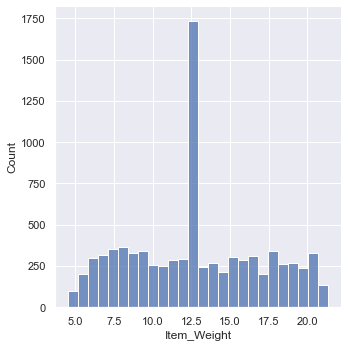

In [62]:
# Item Weight Distribution
plt.figure(figsize=(6,6))
sns.displot(BigMart_data['Item_Weight'])
plt.show()

<Figure size 432x432 with 0 Axes>

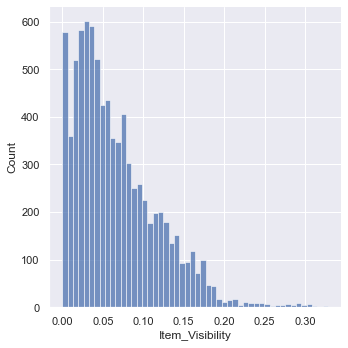

In [63]:
# Item Visibility Distribution
plt.figure(figsize=(6,6))
sns.displot(BigMart_data['Item_Visibility'])
plt.show()

<Figure size 432x432 with 0 Axes>

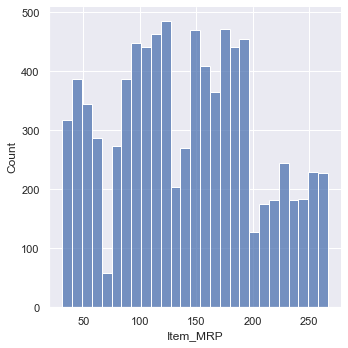

In [64]:
# Item MRP Distribution
plt.figure(figsize=(6,6))
sns.displot(BigMart_data['Item_MRP'])
plt.show()

<Figure size 432x432 with 0 Axes>

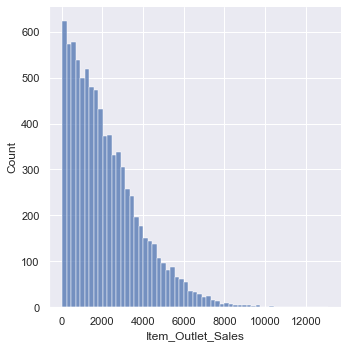

In [65]:
# Item Outlet Sales Distribution
plt.figure(figsize=(6,6))
sns.displot(BigMart_data['Item_Outlet_Sales'])
plt.show()

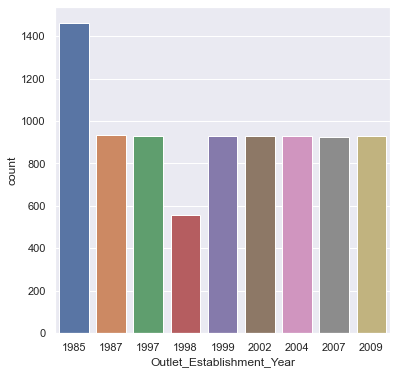

In [66]:
# Outlet Establishment Year Column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=BigMart_data)
plt.show()

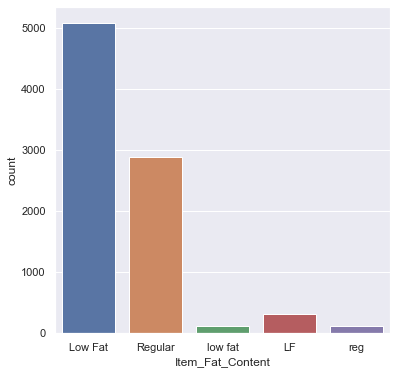

In [67]:
# Categorical Features
# Item Fat Content
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=BigMart_data)
plt.show()

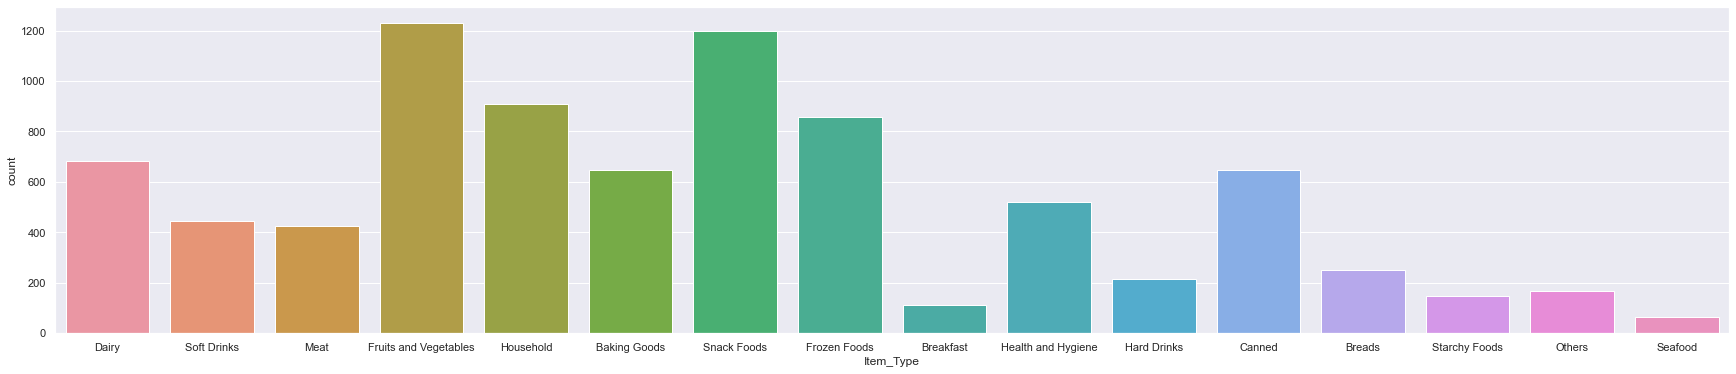

In [68]:
# Item Type Column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=BigMart_data)
plt.show()

In [69]:
# Data Preprocessing
BigMart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [70]:
BigMart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [71]:
BigMart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [72]:
# Label Encoding
encoder = LabelEncoder()

In [81]:
BigMart_data['Item_Identifier']=encoder.fit_transform(BigMart_data['Item_Identifier'])
BigMart_data['Item_Fat_Content']=encoder.fit_transform(BigMart_data['Item_Fat_Content'])
BigMart_data['Item_Type']=encoder.fit_transform(BigMart_data['Item_Type'])
BigMart_data['Outlet_Identifier']=encoder.fit_transform(BigMart_data['Outlet_Identifier'])
BigMart_data['Outlet_Location_Type']=encoder.fit_transform(BigMart_data['Outlet_Location_Type'])
BigMart_data['Outlet_Type']=encoder.fit_transform(BigMart_data['Outlet_Type'])
BigMart_data['Outlet_Size']=encoder.fit_transform(BigMart_data['Outlet_Size'])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['DataFrame', 'str']

In [80]:
BigMart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052
